In [2]:
from scorer import GPTHypernymySuiteModel, HFLMScorer
import pandas as pd


In [ ]:

df = pd.read_csv('data/eval.tsv', sep='\t')
df

In [3]:
model_name = 'gpt2-xl'
scorer = HFLMScorer(model_name, 'cuda')

/home/Envs/mtikhomi/lib/python3.6/site-packages/transformers/configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "


In [4]:
patterns = ['<hypo> or <hyper>']
cohypo_model = GPTHypernymySuiteModel(scorer, patterns, 'data')

In [21]:
df_val = df[df['fold'] == 'val']
df_val

,word1,word2,label,relation,fold
0,comfort,stress,False,antonym,val
1,comfort,stress,False,antonym,val
2,ice,solid,True,hyper,val
3,ice,solid,True,hyper,val
4,shower,bathroom,False,mero,val
...,...,...,...,...,...
731,sound,nothing,False,antonym,val
732,sound,nothing,False,antonym,val
733,sound,nothing,False,antonym,val
734,lake,fluid,False,attrib,val


In [ ]:
wl1 = df_val['']

In [22]:
scores = hs_model.predict_many(df_val['word1'], df_val['word2'])

100%|██████████| 23/23 [00:01<00:00, 15.73it/s]


In [23]:
df_val['score'] = scores

/home/Envs/mtikhomi/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_val.sort_values(by='score', ascending=False)

,word1,word2,label,relation,fold,score
306,like,hate,False,antonym,val,-20.083338
307,like,hate,False,antonym,val,-20.083338
308,like,hate,False,antonym,val,-20.083338
696,blue,white,False,antonym,val,-21.325779
698,blue,white,False,antonym,val,-21.325779
...,...,...,...,...,...,...
582,bell,annoy,False,attrib,val,-35.239628
223,injure,praise,False,antonym,val,-35.332527
224,injure,praise,False,antonym,val,-35.332527
248,meet,refreshment,False,attrib,val,-35.887253


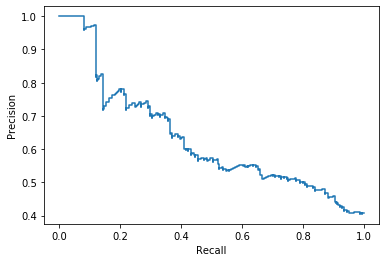

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
#df_val['predict'] = df_val['score'].apply(lambda x: x > -25)
precision, recall, thresholds = precision_recall_curve(df_val['relation'].apply(lambda x: x in ['synonym', 'antonym']), df_val['score'])
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


In [41]:
df['cohypo_score'] = hs_model.predict_many(df['word1'], df['word2'])
df['cohypo'] = df['cohypo_score'].apply(lambda x: x > -25.4)

100%|██████████| 421/421 [00:24<00:00, 17.03it/s]


In [57]:
pattern_complex = 'such <hyper> as <cohypo> or <hypo>'
pattern_simple = 'such <hyper> as <hypo>'

word2cohypo = {}
for word, data in df.groupby(by='word1'):
    data = data.sort_values(by='cohypo_score', ascending=False)
    for word2 in data[data['cohypo']]['word2']:
        if word not in word2cohypo:
            word2cohypo[word] = []
        if word2 not in word2cohypo[word]:
            word2cohypo[word].append(word2)

In [58]:
data

,word1,word2,label,relation,fold,cohypo_score,cohypo
7017,zero,number,True,hyper,test,-28.920265,False
7018,zero,number,True,hyper,test,-28.920265,False


In [59]:
word2cohypo

{'accident': ['mistake', 'event'],
 'act': ['action', 'art', 'perform'],
 'action': ['movement'],
 'actor': ['actress', 'person'],
 'add': ['remove', 'take', 'increase', 'join'],
 'address': ['letter'],
 'adult': ['child'],
 'age': ['life', 'young', 'change'],
 'agreement': ['contract', 'statement'],
 'aid': ['support', 'help'],
 'air': ['water', 'gas'],
 'alcohol': ['drug', 'water'],
 'all': ['nothing'],
 'aluminium': ['aluminum'],
 'animal': ['human', 'plant', 'vegetable', 'person'],
 'answer': ['question'],
 'apartment': ['house', 'home'],
 'argument': ['conclusion'],
 'army': ['navy'],
 'art': ['science', 'play', 'abstract'],
 'artist': ['person'],
 'ascend': ['descend'],
 'atom': ['molecule'],
 'attach': ['connect'],
 'author': ['artist', 'writer', 'person', 'book', 'write'],
 'baby': ['child', 'girl', 'young', 'adult', 'small', 'man'],
 'back': ['main'],
 'bacon': ['ham'],
 'bad': ['good', 'evil', 'right'],
 'bath': ['shower'],
 'bathroom': ['bath', 'toilet'],
 'bathtub': ['bath'

In [44]:
data[data['cohypo']]['word2']

Series([], Name: word2, dtype: object)

In [36]:
thresholds[-100:]

array([-25.8243  , -25.807985, -25.777258, -25.765003, -25.765001,
       -25.743357, -25.722887, -25.655487, -25.65032 , -25.63653 ,
       -25.616707, -25.609798, -25.590271, -25.580671, -25.565928,
       -25.53474 , -25.515362, -25.495024, -25.470695, -25.438013,
       -25.414192, -25.412748, -25.386969, -25.376694, -25.36794 ,
       -25.35722 , -25.304586, -25.304585, -25.28062 , -25.278358,
       -25.278355, -25.225315, -25.168627, -25.132046, -25.12661 ,
       -25.11842 , -25.110039, -25.07517 , -25.061989, -25.06075 ,
       -25.060747, -25.056759, -25.038357, -25.015081, -24.950115,
       -24.904545, -24.83988 , -24.772987, -24.75287 , -24.752607,
       -24.728813, -24.665422, -24.637558, -24.621462, -24.616043,
       -24.486721, -24.48672 , -24.422613, -24.422611, -24.39193 ,
       -24.34718 , -24.290174, -24.19042 , -24.190418, -23.969456,
       -23.936987, -23.917097, -23.917095, -23.8961  , -23.797523,
       -23.75576 , -23.62353 , -23.596539, -23.528223, -23.498

In [33]:
precision[-80:]

array([0.7037037 , 0.69924812, 0.69465649, 0.70542636, 0.7007874 ,
       0.712     , 0.71774194, 0.72357724, 0.7295082 , 0.72727273,
       0.725     , 0.73109244, 0.74358974, 0.73913043, 0.73451327,
       0.72727273, 0.73394495, 0.74074074, 0.73584906, 0.73333333,
       0.73076923, 0.72815534, 0.7254902 , 0.74      , 0.73195876,
       0.72340426, 0.7173913 , 0.72527473, 0.75      , 0.76744186,
       0.76190476, 0.7804878 , 0.7721519 , 0.78205128, 0.77631579,
       0.77333333, 0.77027027, 0.76712329, 0.76388889, 0.75362319,
       0.74242424, 0.73015873, 0.72131148, 0.71666667, 0.74137931,
       0.76785714, 0.78181818, 0.81132075, 0.82692308, 0.82      ,
       0.8125    , 0.80851064, 0.80434783, 0.82222222, 0.81818182,
       0.87804878, 0.94736842, 0.97297297, 0.97142857, 0.96969697,
       0.96875   , 0.96666667, 0.96296296, 0.96      , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [9]:
word2synonymy = {}
for word, data in df.groupby('word1'):
    if word not in word2synonymy:
        word2synonymy[word] = False
    
    if 'synonym' in set(data['relation']):
        word2synonymy[word] = True

for word, data in df.groupby('word2'):
    if word not in word2synonymy:
        word2synonymy[word] = False
    
    if 'synonym' in set(data['relation']):
        word2synonymy[word] = True
len([w for w in word2synonymy if word2synonymy[w]]), len(word2synonymy)

(901, 1749)

In [5]:
import pandas as pd

df_test = pd.read_csv('/var/mtikhomi/work_folder/projects/UnsupervisedHypernymy/datasets/BLESS.test', sep='\t', header=None)
df_val = pd.read_csv('/var/mtikhomi/work_folder/projects/UnsupervisedHypernymy/datasets/BLESS.val', sep='\t', header=None)

df = pd.concat([df_test, df_val])
df = df[df[0].apply(lambda x: x[-1]=='n') & df[1].apply(lambda x: x[-1]=='n')]
df

,0,1,2,3
16,alligator-n,crocodile-n,False,coord
17,alligator-n,frog-n,False,coord
18,alligator-n,lizard-n,False,coord
19,alligator-n,snake-n,False,coord
20,alligator-n,toad-n,False,coord
...,...,...,...,...
2624,sword-n,sat-n,False,random-n
2625,sword-n,slowdown-n,False,random-n
2626,sword-n,transfiguration-n,False,random-n
2627,sword-n,viewer-n,False,random-n


In [6]:
df[0] = df[0].apply(lambda x: x[:-2])
df[1] = df[1].apply(lambda x: x[:-2])
df

,0,1,2,3
16,alligator,crocodile,False,coord
17,alligator,frog,False,coord
18,alligator,lizard,False,coord
19,alligator,snake,False,coord
20,alligator,toad,False,coord
...,...,...,...,...
2624,sword,sat,False,random-n
2625,sword,slowdown,False,random-n
2626,sword,transfiguration,False,random-n
2627,sword,viewer,False,random-n


In [6]:
word2synonymy = set()
for word, data in df.groupby(0):
    #if word not in word2synonymy:
    #    word2synonymy[word] = False
    
    if 'coord' in set(data[3]):
        #word2synonymy[word] = True
        word2synonymy.add(word)

for word, data in df.groupby(1):
    #if word not in word2synonymy:
    #    word2synonymy[word] = False
    
    if 'coord' in set(data[3]):
        word2synonymy.add(word)

len(word2synonymy)

395

In [16]:
len(df[0].unique())

749

In [7]:
df['cohypo_score'] = cohypo_model.predict_many(df[0], df[1])

100%|██████████| 455/455 [00:51<00:00,  8.91it/s]


In [8]:
df = df.sort_values(by='cohypo_score', ascending=False)
df

,0,1,2,3,cohypo_score
7863,box,box,False,coord,-20.026009
11010,cat,dog,False,coord,-20.773535
20355,bus,train,False,coord,-21.179943
20599,car,truck,False,coord,-21.276871
22558,train,bus,False,coord,-21.294832
...,...,...,...,...,...
17473,spoon,amblicipitids,False,random-n,-70.535385
5360,blouse,sinceskillpromotion,False,random-n,-71.414909
1583,missile,ediff-merge-with-ancestor,False,random-n,-72.935974
19656,turnip,campomaiorense,False,random-n,-73.038734


In [14]:
from tqdm import tqdm
word2cohypo = {}
for w in tqdm(word2synonymy):
    w_df = df[df.apply(lambda row: row[0] == w or row[1] == w, axis=1)]
    for i, row in w_df.iterrows():
        if row[0] != row[1]:
            if row[0] == w:
                word2cohypo[w] = row[1]
            else:
                word2cohypo[w] = row[0]
            break

100%|██████████| 395/395 [01:08<00:00,  5.75it/s]


In [34]:
pattern_complex = 'such <hyper> as <cohypo> or <hypo>'
pattern_simple = 'such <hyper> as <hypo>'
hyper_model = GPTHypernymySuiteModel(scorer, [pattern_simple], 'data')

In [37]:
df_t = df[df[0].apply(lambda x: x in word2cohypo)]
df_t

,0,1,2,3,hyper_score
16,alligator,crocodile,False,coord,-39.845886
17,alligator,frog,False,coord,-39.809128
18,alligator,lizard,False,coord,-38.628769
19,alligator,snake,False,coord,-38.737915
20,alligator,toad,False,coord,-42.622257
...,...,...,...,...,...
2624,sword,sat,False,random-n,-42.395901
2625,sword,slowdown,False,random-n,-43.704300
2626,sword,transfiguration,False,random-n,-42.574493
2627,sword,viewer,False,random-n,-40.682613


In [35]:
df['hyper_score'] = hyper_model.predict_many(df[0], df[1])

100%|██████████| 455/455 [00:50<00:00,  8.95it/s]


In [38]:
from sklearn.metrics import average_precision_score

average_precision_score(df_t[3] == 'hyper', df_t['hyper_score'])

0.5034887580230689

In [39]:
import numpy as np


def predict_many(model, patterns, hypos, cohypos, hypers):
    all_res = []
    for pattern in patterns:
        sentences = []
        for x, y, z in zip(hypos, cohypos, hypers):
            sentences.append(generate_sentence(pattern, x, y, z))
        res = np.array(model.score_sentences(sentences))
        all_res.append(res)
    #print(all_res)
    return np.mean(all_res, axis=0)

def generate_sentence(pattern, hypo, cohypo, hyper):
    return pattern.replace('<hypo>', hypo).replace('<hyper>', hyper).replace('<cohypo>', cohypo)

In [57]:
df_t['hyper_complex_score'] = predict_many(scorer, [pattern_complex], df_t[0], [word2cohypo[w] for w in df_t[0]], df_t[1])

100%|██████████| 455/455 [01:05<00:00,  6.99it/s]


In [58]:
average_precision_score(df_t[3] == 'hyper', df_t['hyper_complex_score'])

0.5357131329707303

In [59]:
def calc_map(df, column_name):
    map = []
    for word, data in df.groupby(by=0):
        if 'hyper' in set(data[3]):
            ap = average_precision_score(data[3] == 'hyper', data[column_name])
            map.append(ap)
    return np.mean(map)

In [60]:
calc_map(df_t, 'hyper_score'), calc_map(df_t, 'hyper_complex_score')

(0.6724495904960426, 0.7315268821952285)

In [9]:
import fasttext
import fasttext.util
#fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

In [16]:
from tqdm import tqdm
w2cands = {}
for w in tqdm(df[0].unique()):
    w2cands[w] = ft.get_nearest_neighbors(w, k=100)

100%|██████████| 749/749 [07:12<00:00,  1.73it/s]


In [20]:
from leven import levenshtein

In [19]:
levenshtein('alligator', 'alligators') > len()

1

In [27]:
for w in w2cands:
    w2cands[w] = [[d[0], d[1].lower().strip()] for d in w2cands[w]]

In [48]:
w2cands_f = {}
for w in w2cands:
    w2cands_f[w] = [d for d in w2cands[w] if (d[1] not in w) and (w not in d[1]) and (levenshtein(w, d[1]) > (len(w) / 2))][:100]

In [49]:
len(w2cands_f), len([w for w in w2cands_f if len(w2cands_f[w]) > 0])

(749, 749)

In [50]:
w2cands_f2 = {}
for w in w2cands_f:
    l = len(w2cands_f[w])
    scores = cohypo_model.predict_many([w for i in range(l)], [d[1] for d in w2cands_f[w]])
    w2cands_f2[w] = sorted([[scores[i], w2cands_f[w][i][1]] for i in range(l)], key=lambda x: -x[0])

100%|██████████| 2/2 [00:00<00:00,  7.87it/s]


In [ ]:
w2cands_f2 

In [51]:
w2cands_f2

{'alligator': [[-25.06532, 'crocodile'],
  [-25.065321, 'crocodile'],
  [-28.014357, 'iguana'],
  [-28.043722, 'crocodilian'],
  [-28.539568, 'lizard'],
  [-28.569366, 'croc'],
  [-28.688217, 'snake'],
  [-28.692, 'reptile'],
  [-28.892496, 'manatee'],
  [-29.046577, 'turtle'],
  [-29.129896, 'caiman'],
  [-29.19446, 'panther'],
  [-29.360199, 'gators'],
  [-29.384811, 'toad'],
  [-29.3883, 'catfish'],
  [-29.533976, 'anaconda'],
  [-29.588192, 'tiger'],
  [-29.624195, 'zebra'],
  [-29.81519, 'fish'],
  [-29.88336, 'armadillo'],
  [-30.00423, 'tarantula'],
  [-30.037256, 'amphibian'],
  [-30.039494, 'raccoon'],
  [-30.108154, 'frog'],
  [-30.19708, 'shark'],
  [-30.368618, 'anteater'],
  [-30.36878, 'porcupine'],
  [-30.455456, 'giraffe'],
  [-30.481686, 'rattlesnake'],
  [-30.5632, 'elephant'],
  [-30.617332, 'hippopotamus'],
  [-30.627316, 'crocodiles'],
  [-30.744642, 'stingray'],
  [-30.900745, 'orangutan'],
  [-30.979391, 'ape'],
  [-31.001225, 'eel'],
  [-31.05221, 'muskrat'],
  

In [44]:
w2cands_f

{'alligator': [[0.746753454208374, 'crocodile'],
  [0.6839210987091064, 'croc'],
  [0.6495732665061951, 'gators'],
  [0.5922845602035522, 'crocodiles'],
  [0.5879791378974915, 'caiman'],
  [0.5848178267478943, 'reptile'],
  [0.5767465233802795, 'snake'],
  [0.5667709112167358, 'lizard'],
  [0.5635770559310913, 'crocodilian'],
  [0.562010645866394, 'iguana']],
 'eye': [[0.5744532346725464, 'ocular'],
  [0.5355619788169861, 'glint'],
  [0.533223569393158, 'blink'],
  [0.5329148173332214, 'gaze'],
  [0.5289604067802429, 'ear'],
  [0.5275861024856567, 'opthamologist'],
  [0.5182535648345947, 'gleam'],
  [0.5168232917785645, 'occular'],
  [0.516135036945343, 'watchful'],
  [0.5112297534942627, 'opthalmologist']],
 'foot': [[0.6019846796989441, 'toe'],
  [0.5983012914657593, 'toes'],
  [0.5741109251976013, 'feets'],
  [0.5679256319999695, 'leg'],
  [0.5637205839157104, 'feet.if'],
  [0.562213659286499, 'feeet'],
  [0.5583360195159912, 'feet.this'],
  [0.5565544366836548, 'ankle'],
  [0.54273

In [56]:
word2cohypo = {w: w2cands_f2[w][0][1] for w in w2cands_f2}
word2cohypo

{'alligator': 'crocodile',
 'eye': 'ear',
 'foot': 'ankle',
 'jaw': 'mouth',
 'leg': 'thigh',
 'mouth': 'throat',
 'scale': 'size',
 'skin': 'scalp',
 'tail': 'wag',
 'tooth': 'jaw',
 'frog': 'toad',
 'blood': 'semen',
 'bone': 'marrow',
 'gill': 'fish',
 'head': 'neck',
 'lung': 'respiratory',
 'poison': 'toxin',
 'tongue': 'cheek',
 'wart': 'fungus',
 'lizard': 'reptile',
 'stripe': 'red',
 'snake': 'scorpion',
 'fang': 'claw',
 'venom': 'poison',
 'turtle': 'tortoise',
 'neck': 'chest',
 'shell': 'zsh',
 'dishwasher': 'dryer',
 'button': 'click',
 'control': 'wrest',
 'cup': 'mug',
 'cutlery': 'knife',
 'detergent': 'bleach',
 'dial': 'phone',
 'dish': 'plate',
 'door': 'gate',
 'engine': 'gearbox',
 'front': 'back',
 'glass': 'ceramic',
 'inside': 'out',
 'metal': 'plastic',
 'motor': 'engine',
 'mug': 'coffee',
 'pan': 'fry',
 'plate': 'tray',
 'plug': 'socket',
 'rack': 'shelf',
 'silverware': 'dishes',
 'soap': 'shampoo',
 'steel': 'aluminum',
 'supply': 'demand',
 'tableware': 

In [52]:
word2cohypo = {w: w2cands_f[w][0][1] for w in w2cands_f}
word2cohypo

{'alligator': 'crocodile',
 'eye': 'ocular',
 'foot': 'toe',
 'jaw': 'mandible',
 'leg': 'arm',
 'mouth': 'tongue',
 'scale': 'one-to-ten',
 'skin': 'epidermis',
 'tail': 'snout',
 'tooth': 'molars',
 'frog': 'toad',
 'blood': 'o-positive',
 'bone': 'femur',
 'gill': 'branchial',
 'head': 'honcho',
 'lung': 'emphysema',
 'poison': 'poisionous',
 'tongue': 'cheek',
 'wart': 'verruca',
 'lizard': 'reptile',
 'stripe': 'chevron',
 'snake': 'scorpion',
 'fang': 'talon',
 'venom': 'venemous',
 'turtle': 'tortoise',
 'neck': 'chest',
 'shell': 'clam',
 'dishwasher': 'washer-dryer',
 'button': 'soft-key',
 'control': 'contolling',
 'cup': 'tea.but',
 'cutlery': 'utensils',
 'detergent': 'oxyclean',
 'dial': 'bezel',
 'dish': 'casserole',
 'door': 'ajar',
 'engine': 'powerplant',
 'front': 'rear',
 'glass': 'plexiglas',
 'inside': 'outisde',
 'metal': 'steel',
 'motor': 'series-wound',
 'mug': 'thermos',
 'pan': 'skillet',
 'plate': 'block-off',
 'plug': 'adaptor',
 'rack': 'hanger',
 'silverw

In [31]:
w2cands_f

{'alligator': [[0.746753454208374, 'crocodile'],
  [0.6839210987091064, 'croc'],
  [0.6495732665061951, 'gators'],
  [0.5922845602035522, 'crocodiles'],
  [0.5879791378974915, 'caiman'],
  [0.5848178267478943, 'reptile'],
  [0.5767465233802795, 'snake'],
  [0.5667709112167358, 'lizard'],
  [0.5635770559310913, 'crocodilian'],
  [0.562010645866394, 'iguana']],
 'eye': [[0.5744532346725464, 'ocular'],
  [0.5355619788169861, 'glint'],
  [0.533223569393158, 'blink'],
  [0.5329148173332214, 'gaze'],
  [0.5289604067802429, 'ear'],
  [0.5275861024856567, 'opthamologist'],
  [0.5182535648345947, 'gleam'],
  [0.5168232917785645, 'occular'],
  [0.516135036945343, 'watchful'],
  [0.5112297534942627, 'opthalmologist']],
 'foot': [[0.6019846796989441, 'toe'],
  [0.5983012914657593, 'toes'],
  [0.5741109251976013, 'feets'],
  [0.5679256319999695, 'leg'],
  [0.5637205839157104, 'feet.if'],
  [0.562213659286499, 'feeet'],
  [0.5583360195159912, 'feet.this'],
  [0.5565544366836548, 'ankle'],
  [0.54273

In [14]:
w2cands

{'alligator': [(0.7823739647865295, 'gator'),
  (0.7583182454109192, 'alligators'),
  (0.746753454208374, 'crocodile'),
  (0.711251437664032, 'aligator'),
  (0.6839210987091064, 'croc'),
  (0.6802557110786438, 'Alligator'),
  (0.6495732665061951, 'gators'),
  (0.6152116060256958, 'alligator-like'),
  (0.5922845602035522, 'crocodiles'),
  (0.5879791378974915, 'caiman')],
 'eye': [(0.7260991930961609, 'eye-'),
  (0.7207920551300049, 'eye--'),
  (0.7171691060066223, 'eye.This'),
  (0.7145264148712158, 'eye.The'),
  (0.7126631736755371, 'eye.But'),
  (0.6982097029685974, 'eye.I'),
  (0.691853940486908, 'eye.So'),
  (0.6897538304328918, 'eye.'),
  (0.6877050399780273, 'eyes'),
  (0.6820888519287109, 'eye.What')],
 'foot': [(0.7455036640167236, 'feet'),
  (0.6440647840499878, 'foot.If'),
  (0.6414032578468323, 'foot.It'),
  (0.6299401521682739, 'foots'),
  (0.6286517381668091, 'foot.'),
  (0.6173923015594482, 'foot.The'),
  (0.6118765473365784, 'foot.I'),
  (0.6019846796989441, 'toe'),
  (0.

In [1]:
ft

NameError: name 'ft' is not defined

In [15]:
word2cohypo

{'dragonfly': 'butterfly',
 'lizard': 'snake',
 'trunk': 'box',
 'rat': 'rabbit',
 'canoe': 'yacht',
 'ambulance': 'car',
 'hare': 'rabbit',
 'bicycle': 'car',
 'deer': 'moose',
 'bus': 'train',
 'train': 'bus',
 'sage': 'parsley',
 'wolf': 'fox',
 'ukulele': 'guitar',
 'missile': 'gun',
 'oven': 'microwave',
 'computer': 'phone',
 'owl': 'hawk',
 'socks': 'shirt',
 'tiger': 'lion',
 'pouch': 'bag',
 'broccoli': 'cauliflower',
 'beans': 'corn',
 'pigeon': 'bird',
 'airplane': 'helicopter',
 'rocket': 'missile',
 'donkey': 'horse',
 'tie': 'scarf',
 'chest': 'box',
 'hippopotamus': 'elephant',
 'beret': 'scarf',
 'bonobo': 'gorilla',
 'silverfish': 'moth',
 'shovel': 'hammer',
 'pheasant': 'goose',
 'penguin': 'bird',
 'gun': 'pistol',
 'papaya': 'banana',
 'oboe': 'trumpet',
 'corn': 'potato',
 'camel': 'sheep',
 'wrench': 'tool',
 'dishwasher': 'oven',
 'hawk': 'owl',
 'cod': 'salmon',
 'orangutan': 'gorilla',
 'sword': 'dagger',
 'refrigerator': 'freezer',
 'tavern': 'restaurant',
 '

In [12]:
w_df

,0,1,2,3,cohypo_score
13976,butterfly,dragonfly,False,coord,-25.561785
14331,moth,dragonfly,False,coord,-25.575920
13888,beetle,dragonfly,False,coord,-28.254648
14410,wasp,dragonfly,False,coord,-28.443274
14159,grasshopper,dragonfly,False,coord,-28.872684
14243,hornet,dragonfly,False,coord,-30.027573
14069,cockroach,dragonfly,False,coord,-30.053064
13800,ant,dragonfly,False,coord,-34.375832


In [11]:
word2cohypo

{'dragonfly': 'butterfly'}

In [19]:
word2cohypo

{'radish': 'ha-day'}

In [12]:
w

'radish'

In [8]:
df[]

,0,1,2,3,cohypo_score
16,alligator,crocodile,False,coord,-25.065323
17,alligator,frog,False,coord,-30.108158
18,alligator,lizard,False,coord,-28.539570
19,alligator,snake,False,coord,-28.688225
20,alligator,toad,False,coord,-29.384817
...,...,...,...,...,...
2624,sword,sat,False,random-n,-31.072948
2625,sword,slowdown,False,random-n,-34.699051
2626,sword,transfiguration,False,random-n,-36.164791
2627,sword,viewer,False,random-n,-33.899597


In [25]:
for w in word2synonymy:
    print(df[df[0] == w])
    break

Empty DataFrame
Columns: [0, 1, 2, 3]
Index: []


In [28]:
df[df[1] == w]

,0,1,2,3
13733,tiger-n,canoe-n,False,random-n
19924,battleship-n,canoe-n,False,coord
20823,ferry-n,canoe-n,False,coord
21177,frigate-n,canoe-n,False,coord
22359,tanker-n,canoe-n,False,coord
23241,yacht-n,canoe-n,False,coord


In [24]:
len(df[df[0].apply(lambda x: x in word2synonymy)][0].unique())

222

In [16]:
df[3].unique()

array(['coord', 'hyper', 'mero', 'random-n'], dtype=object)

In [7]:
set(data['relation'])

{'antonym'}

In [5]:
df[df['word2'] == 'abstract']

,word1,word2,label,relation,fold
8541,art,abstract,False,attrib,test
8542,art,abstract,False,attrib,test
8543,art,abstract,False,attrib,test
10002,knowledge,abstract,False,attrib,test
12024,material,abstract,False,antonym,test
12025,material,abstract,False,antonym,test
